<a href="https://colab.research.google.com/github/katiacardoso/Selector_Hat/blob/2410/SelectorHat_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from io import StringIO
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#importação dos dados
url = 'https://raw.githubusercontent.com/katiacardoso/Selector_Hat/main/dataset.csv'

# Baixar o conteúdo do arquivo usando requests
response = requests.get(url)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    # Criar um objeto pandas DataFrame a partir do conteúdo baixado
    data = pd.read_csv(StringIO(response.text), usecols=['Name', 'House'], delimiter=';')
    # Agora você pode usar o DataFrame 'data' normalmente
else:
    print("Falha ao baixar o arquivo. Código de status:", response.status_code)


data.to_csv('dataset_add.csv', index=False)

## Validação do pré processamento dos nomes

In [ ]:
# Pré-processamento dos nomes usando CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))  # Convertendo nomes em vetores de caracteres (bigramas e trigramas)
name_vectors = vectorizer.fit_transform(data['Name'])

# Visualize as características (tokens) e suas representações numéricas
features = vectorizer.get_feature_names_out()
print("Características (tokens):", features)
print("Representações numéricas dos nomes:")
for idx, name in enumerate(data['Name']):
    print(f"{name}: {name_vectors[idx].toarray()}")

## Validação dos dados de treinamento e dados de treino

In [ ]:
# Divida os dados em conjuntos de treino e teste (por exemplo, 80% para treino, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(data['Name'], data['House'], test_size=0.2, random_state=42)

# Verifique o tamanho dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

# Verifique algumas amostras dos conjuntos de treino e teste
print("Amostras do conjunto de treino:")
print(X_train.head())
print(y_train.head())

print("\nAmostras do conjunto de teste:")
print(X_test.head())
print(y_test.head())

Tamanho do conjunto de treino: 77
Tamanho do conjunto de teste: 20
Amostras do conjunto de treino:
49                         Bellatrix Lestrange
70                Nicholas de Mimsy-Porpington
68                           Godric Gryffindor
15                             Peter Pettigrew
39    Myrtle Elizabeth Warren (Moaning Myrtle)
Name: Name, dtype: object
49     Slytherin
70    Gryffindor
68    Gryffindor
15    Gryffindor
39     Ravenclaw
Name: House, dtype: object

Amostras do conjunto de teste:
62                Bloody Baron
40                 Padma Patil
93    Scorpius Hyperion Malfoy
18             Charles Weasley
81             Zacharias Smith
Name: Name, dtype: object
62     Slytherin
40     Ravenclaw
93     Slytherin
18    Gryffindor
81    Hufflepuff
Name: House, dtype: object


In [ ]:
# Criando um pipeline com CountVectorizer e MultinomialNB (classificador Naive Bayes)
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(2, 3))),  # Convertendo nomes em vetores de caracteres
    ('classifier', MultinomialNB())  # Usando o classificador Naive Bayes
])

# Separando dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data['Name'], data['House'], test_size=0.2, random_state=42)

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Fazendo previsões
user_input = input("Digite o nome do usuário: ")
predicted_house = pipeline.predict([user_input])[0]
print(f'O usuário pertence à casa: {predicted_house}')

# Relatório de classificação
y_pred = pipeline.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Relatório em relação aos dados de treino
y_pred_train = pipeline.predict(X_train)
print("Relatório de Classificação (dados de treino):\n", classification_report(y_train, y_pred_train))


Digite o nome do usuário: Hermione
O usuário pertence à casa: Gryffindor
Relatório de Classificação:
               precision    recall  f1-score   support

  Gryffindor       0.67      0.67      0.67         9
  Hufflepuff       0.00      0.00      0.00         3
   Ravenclaw       0.25      0.20      0.22         5
   Slytherin       0.43      1.00      0.60         3

    accuracy                           0.50        20
   macro avg       0.34      0.47      0.37        20
weighted avg       0.43      0.50      0.45        20

Relatório de Classificação (dados de treino):
               precision    recall  f1-score   support

  Gryffindor       1.00      1.00      1.00        29
  Hufflepuff       1.00      1.00      1.00        10
   Ravenclaw       1.00      0.92      0.96        13
   Slytherin       0.96      1.00      0.98        25

    accuracy                           0.99        77
   macro avg       0.99      0.98      0.99        77
weighted avg       0.99      0.99   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Arvore de Decisão

- Até o momento foi o qu deu mais certo, mas está designando para apenas uma casa, então farei algumas validações


## Visualização dos dados


In [ ]:
import matplotlib.pyplot as plt

# Contar o número de amostras em cada classe
class_count = data['House'].value_counts()

# Exibir a contagem de amostras em cada classe
print("Contagem de Amostras por Classe:")
print(class_count)

Contagem de Amostras por Classe:
Gryffindor    38
Slytherin     28
Ravenclaw     18
Hufflepuff    13
Name: House, dtype: int64


## Visualizar rotulação

In [ ]:
# Liste as casas únicas no conjunto de dados
unique_houses = data['House'].unique()
print("Casas de Hogwarts no Conjunto de Dados:")
for house in unique_houses:
    print(house)

Casas de Hogwarts no Conjunto de Dados:
Gryffindor
Ravenclaw
Slytherin
Hufflepuff


# Modelo bem básico

In [ ]:
# Criando um pipeline com CountVectorizer e DecisionTreeClassifier (árvore de decisão)
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(2, 3))),  # Convertendo nomes em vetores de caracteres
    ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.01, random_state=42))  # Usando árvore de decisão com ajuste de hiperparâmetros e regularização
])

# Separando dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data['Name'], data['House'], test_size=0.2, random_state=42)

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Fazendo previsões
user_input = input("Digite o nome do usuário: ")
predicted_house = pipeline.predict([user_input])[0]
print(f'O usuário pertence à casa: {predicted_house}')

# Avaliação do modelo
accuracy = pipeline.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Relatório de classificação
y_pred = pipeline.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# Relatório em relação aos dados de treino
y_pred_train = pipeline.predict(X_train)
print("Relatório de Classificação (dados de treino):\n", classification_report(y_train, y_pred_train))

Digite o nome do usuário: Katia 
O usuário pertence à casa: Gryffindor
Acurácia do modelo: 0.55
Relatório de Classificação:
               precision    recall  f1-score   support

  Gryffindor       0.64      0.78      0.70         9
  Hufflepuff       0.00      0.00      0.00         3
   Ravenclaw       0.50      0.40      0.44         5
   Slytherin       0.40      0.67      0.50         3

    accuracy                           0.55        20
   macro avg       0.38      0.46      0.41        20
weighted avg       0.47      0.55      0.50        20

Relatório de Classificação (dados de treino):
               precision    recall  f1-score   support

  Gryffindor       0.49      1.00      0.66        29
  Hufflepuff       0.00      0.00      0.00        10
   Ravenclaw       1.00      0.38      0.56        13
   Slytherin       1.00      0.52      0.68        25

    accuracy                           0.61        77
   macro avg       0.62      0.48      0.47        77
weighted avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# Modelo incrementado com balanceamento das classes utilizando SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import OneHotEncoder

# Dividir os dados em características (X) e rótulos (y)
X = data['Name']
y = data['House']

# Criar um codificador one-hot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicar codificação one-hot aos dados de treinamento
X_encoded = encoder.fit_transform(X.values.reshape(-1, 1))

# Aplicar SMOTE para oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Verificar o balanceamento das classes após o SMOTE
classes_balanceadas = pd.Series(y_resampled)
contagem_classes = classes_balanceadas.value_counts()
print("Contagem de Exemplos por Classe após SMOTE:")
print(contagem_classes)

# Dividir os dados resampleados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
classifier = DecisionTreeClassifier(random_state=42)
#classifier =  DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.01, random_state=42)
classifier.fit(X_train, y_train)

# Avaliar o modelo nos dados de teste
y_pred_test = classifier.predict(X_test)

# Avaliar o modelo nos dados de treinamento
y_pred_train = classifier.predict(X_train)

# Exibir relatório de classificação para dados de teste
print("Relatório de Classificação para Dados de Teste:\n", classification_report(y_test, y_pred_test))

# Exibir relatório de classificação para dados de treinamento
print("Relatório de Classificação para Dados de Treinamento:\n", classification_report(y_train, y_pred_train))

# Função para prever a casa de Hogwarts com base no nome do usuário
def prever_casa(nome_usuario):
    # Codificar o nome do usuário usando o mesmo encoder utilizado durante o treinamento
    nome_usuario_encoded = encoder.transform([[nome_usuario]])
    casa_prevista = classifier.predict(nome_usuario_encoded)
    return casa_prevista[0]

# Exemplo de uso da função com entrada do usuário
nome_usuario = input("Digite o seu nome: ")
casa_prevista = prever_casa(nome_usuario)
print(f"Com base no seu nome, você seria classificado na casa: {casa_prevista}")

Contagem de Exemplos por Classe após SMOTE:
Gryffindor    38
Ravenclaw     38
Slytherin     38
Hufflepuff    38
Name: House, dtype: int64
Relatório de Classificação para Dados de Teste:
               precision    recall  f1-score   support

  Gryffindor       0.53      1.00      0.69        10
  Hufflepuff       1.00      0.80      0.89         5
   Ravenclaw       1.00      0.70      0.82        10
   Slytherin       1.00      0.17      0.29         6

    accuracy                           0.71        31
   macro avg       0.88      0.67      0.67        31
weighted avg       0.85      0.71      0.69        31

Relatório de Classificação para Dados de Treinamento:
               precision    recall  f1-score   support

  Gryffindor       1.00      1.00      1.00        28
  Hufflepuff       1.00      1.00      1.00        33
   Ravenclaw       1.00      1.00      1.00        28
   Slytherin       1.00      1.00      1.00        32

    accuracy                           1.00       1

In [ ]:
#pip install matplotlib plotly


## Visualizações gráficas do modelo

### Curvas de Aprendizado
- Visualiza como o erro de treinamento e teste estão mudando à medida que você aumenta o tamanho do conjunto de treinamento.
- A **linha vermelha** mostra como o modelo está se saindo nos dados de treinamento à medida que mais exemplos são adicionados.
- A **linha verde **mostra como o modelo está se saindo nos dados de validação (ou teste) à medida que mais exemplos são adicionados.

Se as duas linhas estiverem convergindo para um valor semelhante e alto, isso geralmente indica que o modelo está aprendendo bem e não está sofrendo de overfitting.
### Importância de Recursos
- O gráfico de barras permite identificar quais nomes dos personagens (ou recursos) têm mais influência na predição das casas de Hogwarts.
- Se um único recurso está sendo pesadamente ponderado, pode ser um sinal de overfitting

# ***Pouco Overfitting graças a Deus ❌***



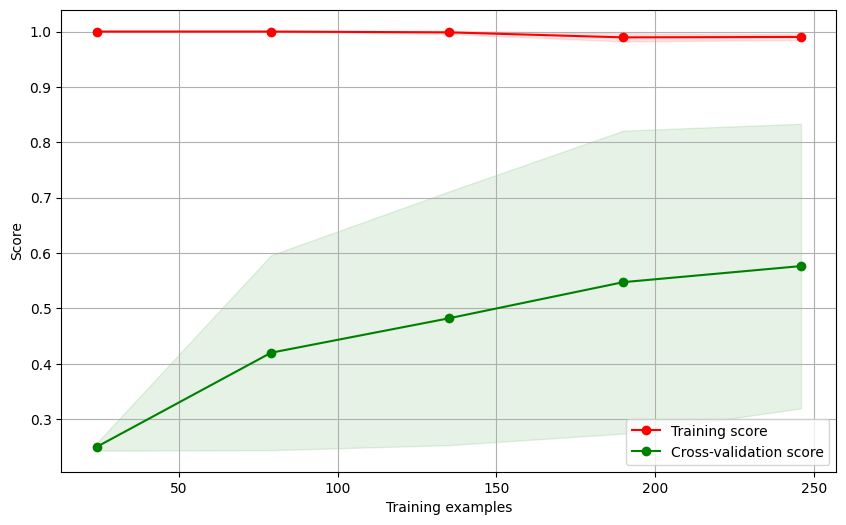

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import learning_curve

# Curva de Aprendizado
def plot_learning_curve(classifier, X, y):
    train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

# Visualização da Curva de Aprendizado
plot_learning_curve(classifier, X_resampled, y_resampled)

# Importância dos Recursos
feature_importance = classifier.feature_importances_
feature_names = encoder.get_feature_names_out(input_features=['Name'])

# Criar DataFrame com importância dos recursos
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualização da Importância dos Recursos (Plotly)
fig = px.bar(importance_df, x='Feature', y='Importance', title='Importância dos Recursos')
fig.show()